## Final Project
### Danial Amin

Import the libraries we need for the lab


In [3]:
import warnings
warnings.filterwarnings('ignore')

import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Read in the csv file from the URL using the request library

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.describe(include = "all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Boxplot for the "Median value of owner-occupied homes"

[Text(0, 0.5, 'Median value of owner-occupied homes'),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median value of owner-occupied homes')]

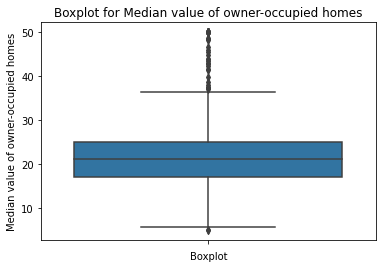

In [6]:
box = sns.boxplot(y = 'MEDV', data = boston_df)
box.set(ylabel = "Median value of owner-occupied homes"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median value of owner-occupied homes")

### Comments
There are various outliers below the first quartile. The median is approximately 20.

# Histogram for the "Charles river variable"

[Text(0.5, 0, 'Charles River variable'),
 Text(0, 0.5, 'Frequency for Charles river variable'),
 Text(0.5, 1.0, 'Histogram for the Charles river variable')]

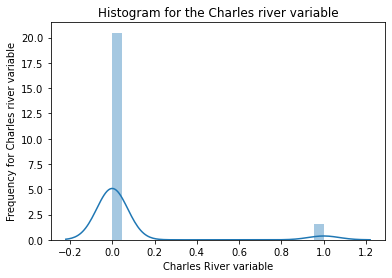

In [7]:
distplot = sns.distplot(boston_df['CHAS'])
distplot.set(xlabel = "Charles River variable"
             ,ylabel = "Frequency for Charles river variable"
            , title = "Histogram for the Charles river variable")

### Comments
The distribution between 0 and 1 which indicate whether the property is along the Charles River or Not. The dataset has more properties which are not around Charles River.

# Boxplot for the MEDV variable vs the AGE variable

[Text(0.5, 0, 'AGE'),
 Text(0, 0.5, 'MEDV'),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable')]

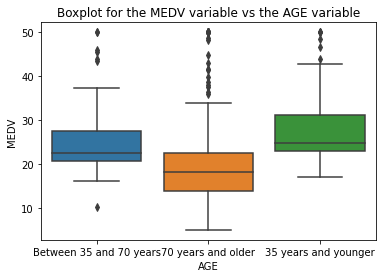

In [8]:
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70 years"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 years and older"

boxplot = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
boxplot.set(xlabel = "AGE"
           , ylabel = "MEDV"
           , title = "Boxplot for the MEDV variable vs the AGE variable")

### Comments
The Median for the group "35 years and younger" is approximately 23, for "70 years and older" approximately 19 and for "Between 35 and 70 years" is approximately 25.

# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

[Text(0, 0.5, 'Nitric Oxides concentration'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0.5, 1.0, 'Scatter Plot between NOX and INDUS')]

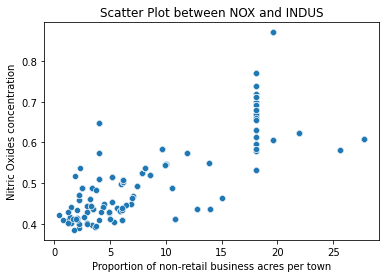

In [9]:
scatter = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatter.set(ylabel = "Nitric Oxides concentration"
            , xlabel = "Proportion of non-retail business acres per town"
           , title = "Scatter Plot between NOX and INDUS")

### Comments
There is a high correlation or positive correlation between the Nitric Oxides concentration and Proportion of non-retail business acres per town.<br>It is a near linear relationship.

# Histogram for the pupil to teacher ratio variable

[Text(0.5, 0, 'Pupil-Teacher ratio variable'),
 Text(0, 0.5, 'Frequency of Pupil-Teacher ratio variable'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

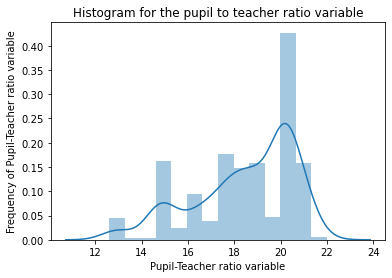

In [10]:
histplot = sns.distplot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil-Teacher ratio variable"
             , ylabel = "Frequency of Pupil-Teacher ratio variable"
            , title = "Histogram for the pupil to teacher ratio variable")

### Comments
The distribution is skewed to the left (negative-skewed distribution)

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Hypothesis 
The hypothesis is stated as below:<br>
**H_0:** *There is no difference between the median value of houses bounded by Charles River from those which are not bounded by Charles River.*<br>
**H_a:** *There is significant difference between the median value of houses bounded by Charles River from those which are not bounded by Charles River.*

### Tests Conducted
We can use the T-Test to check test significance

In [13]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

### Remarks
Since the **p-value is less than alpha value 0.05**, we **reject the null hypothesis** as there is enough proof that **there is a statistical difference in median value of houses bounded by the Charles river.**
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

### Hypothesis 
The hypothesis is stated as below:<br>
**H_0:** *The three population means are equal.*<br>
**H_a:** *The three population means are not equal.*

### Tests Conducted
We can use the T-Test to check test significance.

In [14]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

In [15]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

In [16]:
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

### Remarks
Since the **p-value is less than alpha value 0.05**, we **reject the null hypothesis** as there is enough proof that **there is a statistical difference in MEDV and AGE.**
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

### Hypothesis 
The hypothesis is stated as below:<br>
**H_0:** *There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.*<br>
**H_a:** *There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.*

### Tests Conducted
We can use the Pearson Correlation Coefficient to find the correlation and  to check test significance.

In [17]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])


(0.7636514469209151, 7.913361061238693e-98)

### Remarks
Since the **pearson correlation coefficient is 0.76** which indicate that **there is a strong relation between the nitric oxide concentrations and proportion of non retail business in the area**. Furthermore as the **p-value is less than alpha value 0.05**, we **reject the null hypothesis** as there is enough proof that **this relationship is statically significant**
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

### Hypothesis 
The hypothesis is stated as below:<br>
**H_0:** *There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.*<br>
**H_a:** *There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.*

### Tests Conducted
We can use the Regression Analysis to find the correlation and to check test significance.

In [18]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        12:47:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
np.sqrt(0.062)

0.24899799195977465

### Comments
**There is a positive correlation between the two variables whose value is 0.24 as obtained from the square root of R-squared. Furthermore the coefficient of Distance for estimation of median price is 1.096. As the value of p is less than 0.005, this indicate that the coefficient is statistically significant.**